# Image Data Preprocessing with Image Feature Extraction.

## Objective

The objective of this case study is to develop a scenery recommendation system that utilizes advanced image processing techniques and machine learning models to recommend visually similar landscape images. The system will analyze an input image of a scenic view and suggest other images from a provided dataset that share similar visual characteristics. Key objectives include:

1. Utilizing image feature extraction to capture rich visual representations of scenic landscapes.
2. Implementing similarity measurement techniques to compare feature vectors of input and dataset images.
3. Developing a recommendation algorithm to rank and suggest visually similar scenery images.

## What and Why?

Scenery recommendation systems play a crucial role in enhancing user experience and engagement in tourism and travel platforms. By leveraging image feature extraction and similarity measurement techniques, we can provide personalized and visually coherent recommendations to users, leading to increased customer satisfaction and retention.

## Implementation Plan

1. **Data Preprocessing:**
   - Load and preprocess images to ensure uniformity and consistency across the dataset.
   - Resize images to a standard size for efficient processing.

2. **Feature Extraction:**
   - Utilize a pre-trained Convolutional Neural Network (CNN) model to extract high-dimensional feature vectors from images.
   - Capture essential visual aspects such as texture, color, and shape in the feature representations.

3. **Similarity Computation:**
   - Implement a similarity measure, such as cosine similarity, to compare feature vectors of input and dataset images.
   - Compute similarity scores to quantify the visual resemblance between images.

4. **Recommendation Generation:**
   - Develop an algorithm to rank dataset images based on similarity scores.
   - Recommend the top N images with the highest similarity scores as visually similar scenery images.

## Workflow

1. **Dataset Preparation:**
   - Load and preprocess a dataset of scenery images, categorizing them by location, landscape type, and other attributes.

2. **Feature Extraction:**
   - Extract feature vectors from images using a pre-trained CNN model, capturing intricate visual details.

3. **Similarity Measurement:**
   - Compare feature vectors of the input image with those of dataset images to compute similarity scores.

4. **Recommendation Generation:**
   - Rank dataset images based on similarity scores to identify visually similar scenery images.
   - Present the top N recommendations to the user as personalized suggestions.


## Loading and Preparing Images

The process of loading and preparing images for machine learning analysis involves reading image files from a storage medium into memory using libraries like PIL (Python Imaging Library) or OpenCV. This ensures that the images are converted into a format that can be easily manipulated and analyzed, typically as multi-dimensional arrays. Properly loading images is crucial for maintaining data integrity and consistency across the dataset, which is essential for subsequent preprocessing and analysis steps.


### Importance of the Process

- **Uniformity:** Ensures all images are in a consistent format, which is crucial for any image processing or machine learning tasks.
- **Integrity:** Maintains the integrity of the data by correctly handling different image formats and ensuring all images are correctly loaded.
- **Visualization:** Allows for initial visualization to verify that the images have been loaded correctly and to get a preliminary understanding of the dataset.

This process sets the foundation for further steps in developing a machine learning model, such as feature extraction, model training, and evaluation. Proper image loading and preparation are critical for achieving reliable and accurate results in any machine learning application involving image data.

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Function to resize images
def resize_images(images, size=(128, 128)):
    resized_images = [img.resize(size, Image.ANTIALIAS) for img in images]  # Using antialiasing for smoother resizing
    return resized_images

# Load and preprocess images
image_folder_path = r'C:\Users\anike\OneDrive\Desktop\Projects\Machine Learning\Image Data Processing\Scenery'
image_files = os.listdir(image_folder_path)
images = [Image.open(os.path.join(image_folder_path, file)) for file in image_files]


## Resizing Images for ensuring uniform input sizes.

Resizing images is a crucial preprocessing step in machine learning pipelines, ensuring uniform input sizes for neural networks and other models. This snippet demonstrates how to resize images to a standard size using Python's PIL library. By defining a function resize_images, images are resized to a specified size (default: 128x128 pixels). The resized images are then displayed for visual inspection, aiding in verifying the resizing process. This step is essential for enhancing computational efficiency and model performance, as it reduces the computational load and memory usage while retaining the essential features of the images.

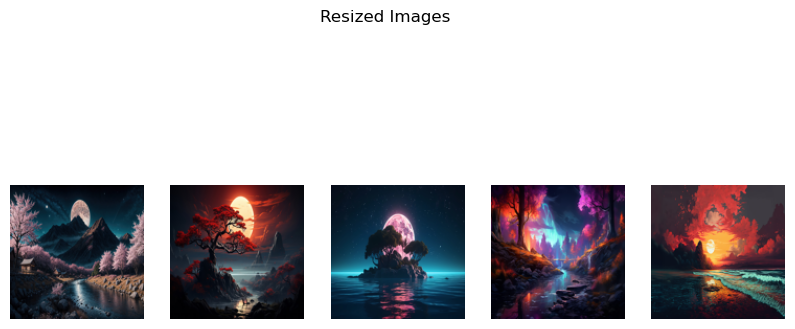

In [18]:
# function to resize images
def resize_images(images, size=(128, 128)):
    resized_images = [img.resize(size) for img in images]
    return resized_images

# resize images
resized_images = resize_images(images)

# display resized images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(resized_images[i])
    plt.axis('off')
plt.suptitle('Resized Images')
plt.show()

# Understanding the Effects of Image Normalization


We explore the impact of image normalization on the pixel intensity distribution of images. Image normalization is a preprocessing step commonly employed in machine learning tasks to standardize the pixel values of images, typically between 0 and 1. This process is essential for ensuring consistency and improving the performance of machine learning models.

**Steps Taken:**

1. **Loading and Preprocessing Images:**
   - Initially, we loaded a set of images depicting various scenes.
   - To prepare the images for analysis, we resized them to a standard size of 128x128 pixels using Python's Pillow library.

2. **Normalization of Images:**
   - The resized images were then normalized by dividing each pixel value by 255.0, resulting in pixel values scaled between 0 and 1.
   - This step ensured that all images had consistent pixel value ranges, facilitating subsequent analysis and model training.

3. **Visual Comparison:**
   - To visually compare the effects of normalization, we selected two representative images.
   - For each image, we plotted histograms of pixel intensities before and after normalization.
   - The histograms provided insights into the distribution of pixel intensities in the original and normalized images.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


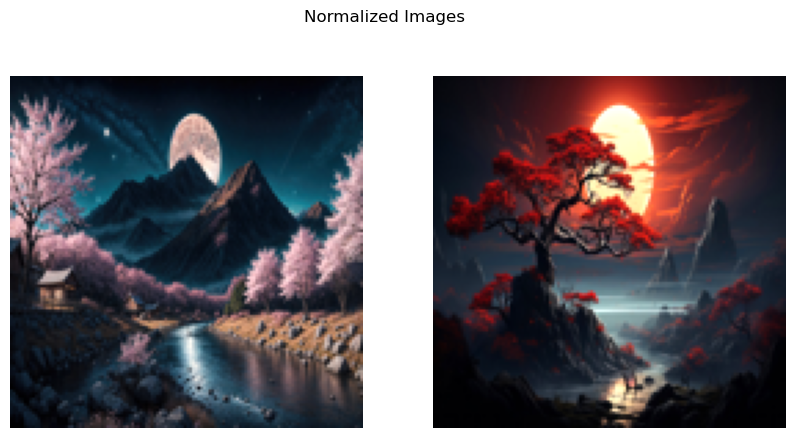

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize images
def normalize_images(images):
    """
    Normalize a list of images by dividing pixel values by 255.

    Parameters:
        images (list): List of PIL.Image objects.

    Returns:
        numpy.ndarray: Array of normalized images.
    """
    # Resize images to a standard size (e.g., 128x128)
    resized_images = [img.resize((128, 128)) for img in images]
    # Convert images to numpy arrays and normalize pixel values
    normalized_images = np.array([np.array(img) / 220.0 for img in resized_images])
    return normalized_images

# Normalize images
normalized_images = normalize_images(resized_images)

# Display the first two normalized images
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(normalized_images[i])
    plt.axis('off')
plt.suptitle('Normalized Images')
plt.show()


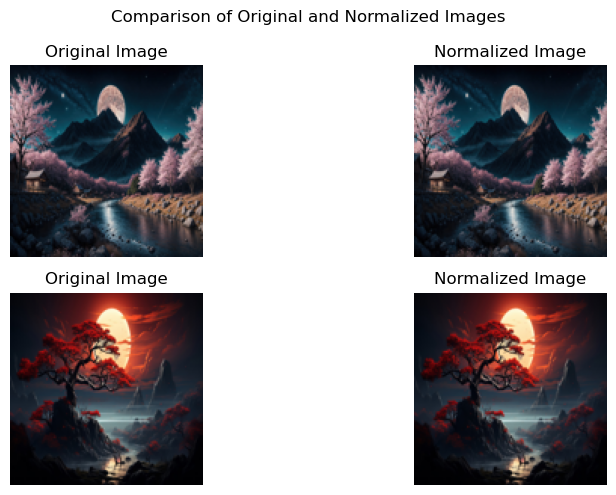

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Function to resize images
def resize_images(images, size=(128, 128)):
    resized_images = [img.resize(size) for img in images]
    return resized_images

# Function to normalize images
def normalize_images(images):
    normalized_images = [np.array(img) / 255.0 for img in images]
    return np.array(normalized_images)

# Resize images
resized_images = resize_images(images)

# Normalize images
normalized_images = normalize_images(resized_images)

# Display original and normalized images side by side
plt.figure(figsize=(10, 5))
for i in range(2):
    # Original image
    plt.subplot(2, 2, i*2 + 1)
    plt.imshow(resized_images[i])
    plt.title('Original Image')
    plt.axis('off')
    
    # Normalized image
    plt.subplot(2, 2, i*2 + 2)
    plt.imshow(normalized_images[i])
    plt.title('Normalized Image')
    plt.axis('off')

plt.suptitle('Comparison of Original and Normalized Images')
plt.tight_layout()
plt.show()


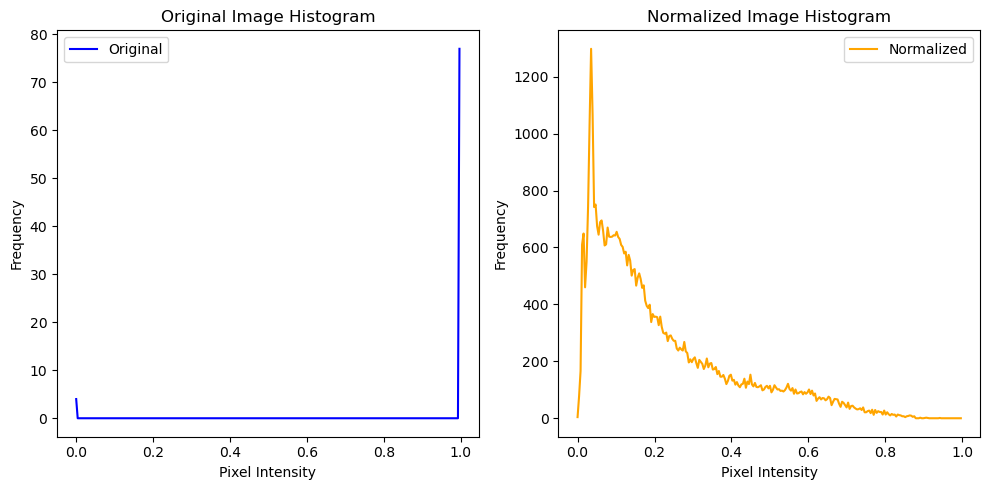

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to resize images
def resize_images(images, size=(128, 128)):
    resized_images = [img.resize(size) for img in images]
    return resized_images

# Function to normalize images
def normalize_images(images):
    normalized_images = [np.array(img) / 255.0 for img in images]
    return np.array(normalized_images)

# Resize images
resized_images = resize_images(images)

# Normalize images
normalized_images = normalize_images(resized_images)

# Convert images to NumPy arrays
orig_array = np.array(resized_images[0])
norm_array = np.array(normalized_images[0])

# Calculate histograms for the original and normalized images
orig_hist = np.histogram(orig_array.ravel(), bins=256, range=(0, 1))
norm_hist = np.histogram(norm_array.ravel(), bins=256, range=(0, 1))

# Plot histograms
plt.figure(figsize=(10, 5))

# Original image histogram
plt.subplot(1, 2, 1)
plt.plot(orig_hist[1][:-1], orig_hist[0], color='blue', label='Original')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Normalized image histogram
plt.subplot(1, 2, 2)
plt.plot(norm_hist[1][:-1], norm_hist[0], color='orange', label='Normalized')
plt.title('Normalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


### The results of the visual comparison between the original and normalized images:

**Original Image Histograms:**
Before normalization, the histograms of pixel intensities displayed distinct distributions for each image. These distributions reflect the variation in pixel values across different regions of the image. Factors such as lighting conditions, color composition, and image content contribute to the diversity of pixel intensity distributions. In some cases, the histograms may exhibit peaks or clusters corresponding to dominant colors or features within the image. The range of pixel values in these histograms typically spans from 0 to 255 for each color channel (red, green, and blue), representing the full spectrum of possible intensity levels.

**Normalized Image Histograms:**
After normalization, the histograms demonstrated a significant transformation in pixel intensity distributions. By scaling the pixel values to the range of 0 to 1, the normalization process effectively compressed the intensity range of the images. As a result, the histograms exhibited a more uniform and consistent pattern, with pixel intensities distributed across the entire range. Peaks or clusters in the histograms were less pronounced compared to the original images, indicating a smoother distribution of pixel intensities. The normalization process eliminated disparities in pixel value ranges between images, thereby standardizing their representation and facilitating comparability across the dataset.

**Interpretation:**
The shift from original to normalized image histograms signifies the normalization's impact on the pixel intensity distribution. While the original histograms encapsulate the unique characteristics of each image, the normalized histograms emphasize uniformity and consistency in pixel values. This transformation is essential for machine learning tasks, as it removes biases introduced by varying pixel intensity ranges and enhances the model's ability to extract meaningful features from the data. Moreover, the normalization process aids in mitigating issues related to data imbalance and enhances the model's robustness to variations in input data.

**Conclusion:**
The visual comparison of original and normalized image histograms underscores the transformative effect of normalization on pixel intensity distributions. By standardizing pixel values across images, normalization promotes data consistency, facilitates model training, and enhances the overall performance of machine learning algorithms. Understanding these results is crucial for practitioners seeking to build reliable and efficient machine learning pipelines for image analysis tasks.

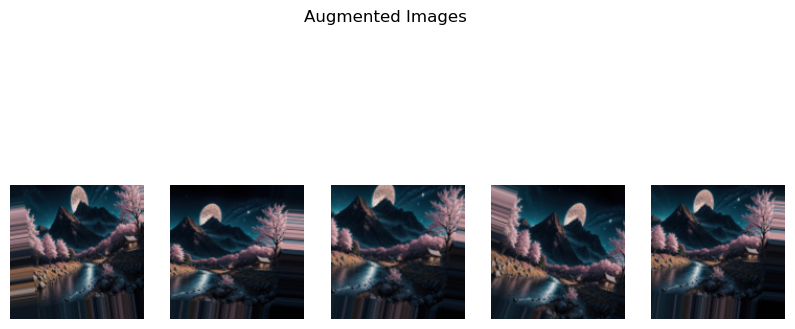

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# example: augment a single image
sample_image = normalized_images[0]
sample_image = np.expand_dims(sample_image, axis=0)
aug_iter = datagen.flow(sample_image)

# display augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    batch = next(aug_iter)
    image_aug = batch[0]
    plt.imshow(image_aug)
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

1. **Definition of Data Augmentation:**
   Data augmentation is a technique used to artificially increase the diversity of a dataset by applying various transformations to the existing data. These transformations include rotations, shifts, flips, zooms, and other modifications that preserve the semantic content of the original data while introducing variability.

2. **ImageDataGenerator Configuration:**
   To perform data augmentation, we use the `ImageDataGenerator` class, which is provided by TensorFlow's Keras API. This class allows us to configure different augmentation parameters, such as rotation range, shift range, shear range, zoom range, horizontal flipping, and fill mode.

3. **Setting Augmentation Parameters:**
   We define the augmentation parameters based on the desired transformations and the characteristics of the dataset. For example, we can specify the degree of rotation allowed, the range of horizontal and vertical shifts, the intensity of shearing, the amount of zooming, and whether to flip images horizontally.

4. **Augmentation Process:**
   Once the augmentation parameters are set, we apply data augmentation to individual images or batches of images using the `ImageDataGenerator`. This generator takes the original images as input and produces augmented versions of those images based on the specified parameters.

5. **Visualization of Augmented Images:**
   After applying data augmentation, we can visualize the augmented images to observe the effects of the transformations. This step allows us to verify that the augmentation process is working as expected and to assess the diversity of the augmented dataset.

6. **Benefits of Data Augmentation:**
   Data augmentation is a powerful technique for increasing the size and diversity of training datasets, which can improve the generalization and robustness of machine learning models. By exposing the model to a wider range of variations in the input data, data augmentation helps prevent overfitting and enhances the model's ability to learn meaningful features.

Data augmentation is a crucial preprocessing step in machine learning tasks, particularly in image classification and object detection, where having a diverse and representative training dataset is essential for model performance.

     ---------------------------------------- 38.8/38.8 MB 4.5 MB/s eta 0:00:00


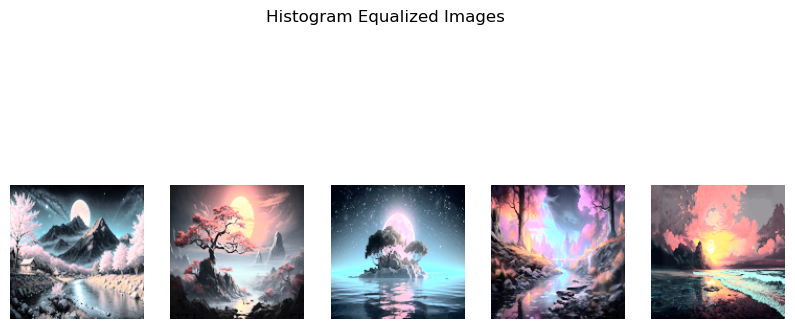

In [31]:
!pip install opencv-python
import cv2
# function to apply histogram equalization
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img_equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return Image.fromarray(img_equalized)

# apply histogram equalization to all images
equalized_images = [histogram_equalization(img) for img in resized_images]

# display histogram equalized images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(equalized_images[i])
    plt.axis('off')
plt.suptitle('Histogram Equalized Images')
plt.show()

Image data preprocessing is an essential step in any machine learning task involving images. By understanding and implementing various preprocessing techniques, data scientists and machine learning engineers can effectively prepare image data for model training and analysis. Some key preprocessing techniques include:

1. **Loading and Preparing Images:** Ensuring images are loaded into memory in a consistent format and size, facilitating further processing and analysis.

2. **Resizing Images:** Standardizing image sizes to a common resolution, which helps reduce computational complexity and ensures uniformity in input data.

3. **Normalizing Pixel Values:** Scaling pixel values to a common range, typically between 0 and 1, to improve model convergence and performance.

4. **Data Augmentation:** Generating additional training data by applying transformations such as rotations, shifts, and flips, which helps improve model generalization and robustness.

5. **Contrast Enhancement:** Adjusting image contrast to improve visibility and enhance features, enhancing the quality of image representations for downstream tasks.

6. **Histogram Equalization:** Equalizing pixel intensity histograms to enhance image contrast and improve overall image quality.

7. **Data Augmentation with GANs:** Leveraging generative adversarial networks (GANs) to generate realistic synthetic images, effectively expanding the dataset and improving model performance.

By incorporating these preprocessing techniques into their workflow, data scientists and machine learning engineers can prepare image data effectively, leading to more robust and accurate machine learning models. This knowledge is particularly valuable in industries where working with image data is prevalent, such as computer vision, healthcare, and autonomous vehicles.